## Factor Validity Test

In [1]:
import BackTest as bt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Duplicate key in file WindowsPath('C:/Users/18450/anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family: SimHei')


In [2]:
# load predicted result
alphanet_predict_w = np.load(file="predict/alphanet_predict_w_0.npy")
cnn_predict_w = np.load(file="predict/cnn_predict_w_0.npy")
lr_predict_w = np.load(file="predict/lr_predict_w_0.npy")
rf_predict_w = np.load(file="predict/randomforest_predict_w_0.npy")
for i in range(1,17):
    alphanet_predict_w0 = np.load(file="predict/alphanet_predict_w_"+str(i)+".npy")
    cnn_predict_w0 = np.load(file="predict/cnn_predict_w_"+str(i)+".npy")
    lr_predict_w0 = np.load(file="predict/lr_predict_w_"+str(i)+".npy")
    rf_predict_w0 = np.load(file="predict/randomforest_predict_w_"+str(i)+".npy")
    
    alphanet_predict_w = np.vstack((alphanet_predict_w, alphanet_predict_w0))
    cnn_predict_w = np.vstack((cnn_predict_w, cnn_predict_w0))
    lr_predict_w = np.vstack((lr_predict_w, lr_predict_w0))
    rf_predict_w = np.vstack((rf_predict_w, rf_predict_w0))
# load trade data
day10_return = np.load('y_data.npy')
daily_return = np.load('daily_return.npy')
ln_mv = np.array(pd.read_excel('val_lnmv.xlsx', skiprows=3, index_col=0))
trade_day = np.array(pd.read_excel('trade_day.xlsx', skiprows=3, index_col=0))
day10_return = day10_return[range(500,len(day10_return),10),:][:-12,:]
ln_mv = np.array(ln_mv)[530:2570,:]
trade_day = np.array(trade_day)[530:2570,:]
daily_return = daily_return[30:2070,:]

### Rank_IC

Firstly, we calculate Rank IC of factors that we get from four different machine learning methods. Rank IC shows the relation between the rank of factors and the rank of asset return. **A high positive or a low negative correlation mean our factor is well explained the asset return and have a good prediction.**

$$Rank\_IC = Corr(Rank(factor),Rank(asset\_return))$$

In order to analyze the incremental information of the synthetic factor, we also show the test results after the market value is neutralized.  

$$factor = \beta_0 + \beta_1 \times ln\_mv$$

$$factor\_mv\_neutral = factor - \hat{factor} = factor - \hat{\beta_0}- \hat{\beta_1} \times ln\_mv$$

In [3]:
alphanet_predict_S1 = bt.SingleFactorValidityTest(factor=pd.DataFrame(alphanet_predict_w), sto_ret_10day=pd.DataFrame(day10_return),
                                                 mv_neutral=False, mv_weighted=True, ln_mv=pd.DataFrame(ln_mv[range(0,len(ln_mv),10),:]))
alphanet_predict_result1 = alphanet_predict_S1.out_put()

cnn_predict_S1 = bt.SingleFactorValidityTest(factor=pd.DataFrame(cnn_predict_w), sto_ret_10day=pd.DataFrame(day10_return),
                                             mv_neutral=False, mv_weighted=True, ln_mv=pd.DataFrame(ln_mv[range(0,len(ln_mv),10),:]))
cnn_predict_result1 = cnn_predict_S1.out_put()

lr_predict_S1 = bt.SingleFactorValidityTest(factor=pd.DataFrame(lr_predict_w), sto_ret_10day=pd.DataFrame(day10_return),
                                           mv_neutral=False, mv_weighted=True, ln_mv=pd.DataFrame(ln_mv[range(0,len(ln_mv),10),:]))
lr_predict_result1 = lr_predict_S1.out_put()

rf_predict_S1 = bt.SingleFactorValidityTest(factor=pd.DataFrame(rf_predict_w), sto_ret_10day=pd.DataFrame(day10_return),
                                           mv_neutral=False, mv_weighted=True, ln_mv=pd.DataFrame(ln_mv[range(0,len(ln_mv),10),:]))
rf_predict_result1 = rf_predict_S1.out_put()

# ln_market_value neutral
alphanet_predict_S2 = bt.SingleFactorValidityTest(factor=pd.DataFrame(alphanet_predict_w), 
                                                  sto_ret_10day=pd.DataFrame(day10_return),mv_neutral=True, mv_weighted=True,
                                                  ln_mv=pd.DataFrame(ln_mv[range(0,len(ln_mv),10),:]))
alphanet_predict_result2 = alphanet_predict_S2.out_put()

cnn_predict_S2 = bt.SingleFactorValidityTest(factor=pd.DataFrame(cnn_predict_w), sto_ret_10day=pd.DataFrame(day10_return),
                                             mv_neutral=True, mv_weighted=True,ln_mv=pd.DataFrame(ln_mv[range(0,len(ln_mv),10),:]))
cnn_predict_result2 = cnn_predict_S2.out_put()

lr_predict_S2 = bt.SingleFactorValidityTest(factor=pd.DataFrame(lr_predict_w), sto_ret_10day=pd.DataFrame(day10_return),
                                            mv_neutral=True, mv_weighted=True,ln_mv=pd.DataFrame(ln_mv[range(0,len(ln_mv),10),:]))
lr_predict_result2 = lr_predict_S2.out_put()

rf_predict_S2 = bt.SingleFactorValidityTest(factor=pd.DataFrame(rf_predict_w), sto_ret_10day=pd.DataFrame(day10_return),
                                            mv_neutral=True, mv_weighted=True,ln_mv=pd.DataFrame(ln_mv[range(0,len(ln_mv),10),:]))
rf_predict_result2 = rf_predict_S2.out_put()

In [4]:
Rank_IC_analyze = pd.DataFrame(index=['alphanet_factor',#'alphanet_mv_neutral_factor',
                                     'cnn_factor','cnn_mv_neutral_factor',
                                     'LR_factor','LR_mv_neutral_factor',
                                     'RF_factor','RF_mv_neutral_factor'],
                          columns=['Rank_IC_mean','Rank_IC_std','Rank_IC_IR','Rank_IC>0'])
Rank_IC_analyze.loc['alphanet_factor',:] = ["%.2f%%" % (alphanet_predict_result1['Rank_IC_mean'] * 100), 
                                "%.2f%%" % (alphanet_predict_result1['Rank_IC'].std() * 100), 
                                "%.2f" % (alphanet_predict_result1['Rank_IC_mean']/alphanet_predict_result1['Rank_IC'].std()),
                                "%.2f%%" % ((alphanet_predict_result1['Rank_IC']>0).sum()/len(alphanet_predict_result1['Rank_IC']) * 100)
                                ]
#Rank_IC_analyze.loc['alphanet_mv_neutral_factor',:] = ["%.2f%%" % (alphanet_predict_result2['Rank_IC_mean'] * 100), 
#                                            "%.2f%%" % (alphanet_predict_result2['Rank_IC'].std() * 100), 
#                                            "%.2f" % (alphanet_predict_result2['Rank_IC_mean']/alphanet_predict_result2['Rank_IC'].std()),
#                                            "%.2f%%" % ((alphanet_predict_result2['Rank_IC']>0).sum()/len(alphanet_predict_result2['Rank_IC']) * 100)
#                                           ]
Rank_IC_analyze.loc['cnn_factor',:] = ["%.2f%%" % (cnn_predict_result1['Rank_IC_mean'] * 100), 
                                "%.2f%%" % (cnn_predict_result1['Rank_IC'].std() * 100), 
                                "%.2f" % (cnn_predict_result1['Rank_IC_mean']/cnn_predict_result1['Rank_IC'].std()),
                                "%.2f%%" % ((cnn_predict_result1['Rank_IC']>0).sum()/len(cnn_predict_result1['Rank_IC']) * 100)
                                ]
Rank_IC_analyze.loc['cnn_mv_neutral_factor',:] = ["%.2f%%" % (cnn_predict_result2['Rank_IC_mean'] * 100), 
                                            "%.2f%%" % (cnn_predict_result2['Rank_IC'].std() * 100), 
                                            "%.2f" % (cnn_predict_result2['Rank_IC_mean']/cnn_predict_result2['Rank_IC'].std()),
                                            "%.2f%%" % ((cnn_predict_result2['Rank_IC']>0).sum()/len(cnn_predict_result2['Rank_IC']) * 100)
                                            ]
Rank_IC_analyze.loc['LR_factor',:] = ["%.2f%%" % (lr_predict_result1['Rank_IC_mean'] * 100), 
                                "%.2f%%" % (lr_predict_result1['Rank_IC'].std() * 100), 
                                "%.2f" % (lr_predict_result1['Rank_IC_mean']/lr_predict_result1['Rank_IC'].std()),
                                "%.2f%%" % ((lr_predict_result1['Rank_IC']>0).sum()/len(lr_predict_result1['Rank_IC']) * 100)
                                ]
Rank_IC_analyze.loc['LR_mv_neutral_factor',:] = ["%.2f%%" % (lr_predict_result2['Rank_IC_mean'] * 100), 
                                            "%.2f%%" % (lr_predict_result2['Rank_IC'].std() * 100), 
                                            "%.2f" % (lr_predict_result2['Rank_IC_mean']/lr_predict_result2['Rank_IC'].std()),
                                            "%.2f%%" % ((lr_predict_result2['Rank_IC']>0).sum()/len(lr_predict_result2['Rank_IC']) * 100)
                                            ]
Rank_IC_analyze.loc['RF_factor',:] = ["%.2f%%" % (rf_predict_result1['Rank_IC_mean'] * 100), 
                                "%.2f%%" % (rf_predict_result1['Rank_IC'].std() * 100), 
                                "%.2f" % (rf_predict_result1['Rank_IC_mean']/rf_predict_result1['Rank_IC'].std()),
                                "%.2f%%" % ((rf_predict_result1['Rank_IC']>0).sum()/len(rf_predict_result1['Rank_IC']) * 100)
                                ]
Rank_IC_analyze.loc['RF_mv_neutral_factor',:] = ["%.2f%%" % (rf_predict_result2['Rank_IC_mean'] * 100), 
                                            "%.2f%%" % (rf_predict_result2['Rank_IC'].std() * 100), 
                                            "%.2f" % (rf_predict_result2['Rank_IC_mean']/rf_predict_result2['Rank_IC'].std()),
                                            "%.2f%%" % ((rf_predict_result2['Rank_IC']>0).sum()/len(rf_predict_result2['Rank_IC']) * 100)
                                            ]
Rank_IC_analyze

,Rank_IC_mean,Rank_IC_std,Rank_IC_IR,Rank_IC>0
alphanet_factor,nan%,nan%,nan,0.00%
cnn_factor,1.64%,10.98%,0.15,36.27%
cnn_mv_neutral_factor,0.68%,12.23%,0.06,35.78%
LR_factor,0.37%,13.72%,0.03,51.96%
LR_mv_neutral_factor,0.11%,12.63%,0.01,49.51%
RF_factor,0.22%,11.79%,0.02,52.45%
RF_mv_neutral_factor,0.23%,10.69%,0.02,49.51%


**The synthetic factors do not have a pretty well explanation of asset returns. Copated with logistice regression and random forest, CNN has better correlation with asset returns with a highest mean of Rank_IC.**

**There must something wrong in alphanet since it has no correlation with return. After checking the factor data, we find CNN find nothing after learning. All factors of each stock are totally same.**

In [5]:
pd.DataFrame(alphanet_predict_w)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.396033,0.396033,0.396033,0.396033,0.396033,0.396033,0.396033,NaN,NaN,0.396033,...,0.396033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.396033,0.396033,0.396033,0.396033,0.396033,0.396033,0.396033,NaN,NaN,0.396033,...,0.396033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.396033,NaN,0.396033,0.396033,0.396033,0.396033,NaN,NaN,NaN,0.396033,...,0.396033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.396033,NaN,0.396033,0.396033,0.396033,0.396033,NaN,NaN,NaN,0.396033,...,0.396033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.396033,NaN,0.396033,0.396033,0.396033,0.396033,NaN,NaN,NaN,0.396033,...,0.396033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,...,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561
200,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,...,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561
201,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,...,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561
202,0.464561,0.464561,NaN,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,...,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561,0.464561


C:\Users\18450\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\18450\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


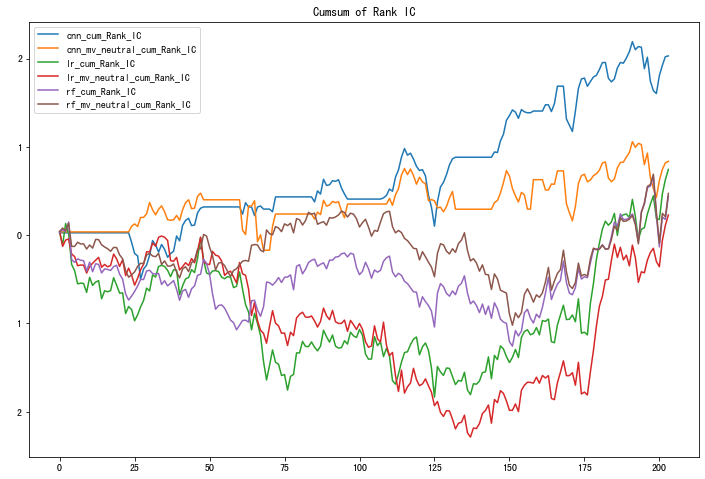

In [6]:
plt.figure(figsize=(12, 8))
plt.title('Cumsum of Rank IC')
#plt.plot(alphanet_predict_result1['cum_Rank_IC'],label = 'alphanet_cum_Rank_IC')
#plt.plot(alphanet_predict_result2['cum_Rank_IC'],label = 'alphanet_mv_neutral_cum_Rank_IC')
plt.plot(cnn_predict_result1['cum_Rank_IC'].fillna(method='bfill'),label = 'cnn_cum_Rank_IC')
plt.plot(cnn_predict_result2['cum_Rank_IC'].fillna(method='bfill'),label = 'cnn_mv_neutral_cum_Rank_IC')
plt.plot(lr_predict_result1['cum_Rank_IC'],label = 'lr_cum_Rank_IC')
plt.plot(lr_predict_result2['cum_Rank_IC'],label = 'lr_mv_neutral_cum_Rank_IC')
plt.plot(rf_predict_result1['cum_Rank_IC'],label = 'rf_cum_Rank_IC')
plt.plot(rf_predict_result2['cum_Rank_IC'],label = 'rf_mv_neutral_cum_Rank_IC')
plt.legend()

### Hierarchical backtest (market_value weighted)

At the same time, we also conducted a hierarchical back-testing test. **The stocks are divided into five groups according to the order of factors from small to large**, and the market value of each group is weighted to analyze the net value trend during the test period. If the five groups of trends are stratified obviously, it means that the factor explains the asset return well. 

**CNN  Hierarchical backtest**

The fifth group which the factors value are highest makes a much better performance than other four groups. However, The other four groups are not distinguished obviously.

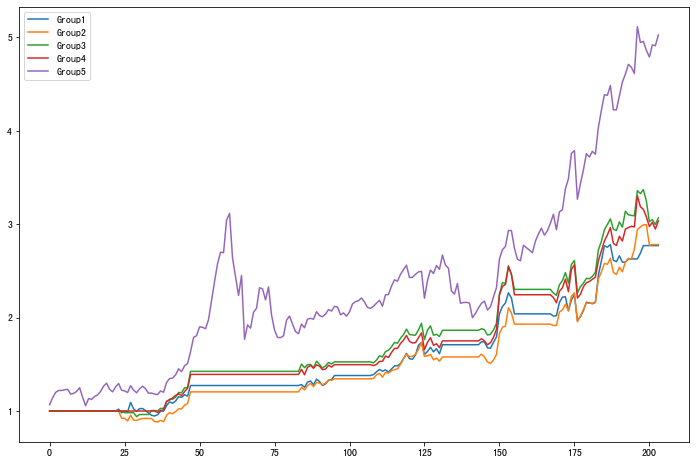

In [7]:
cnn_predict_S1.HierarchicalBacktest()

**Logistic Regression Hierarchical backtest**

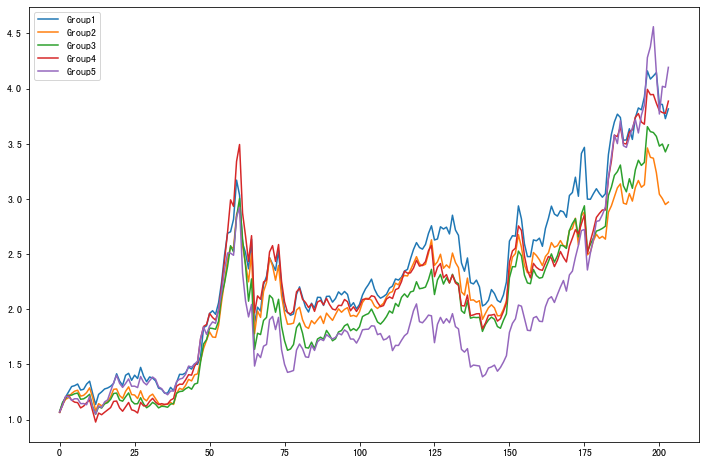

In [8]:
lr_predict_S1.HierarchicalBacktest()

**Random Forest Hierarchical backtest**

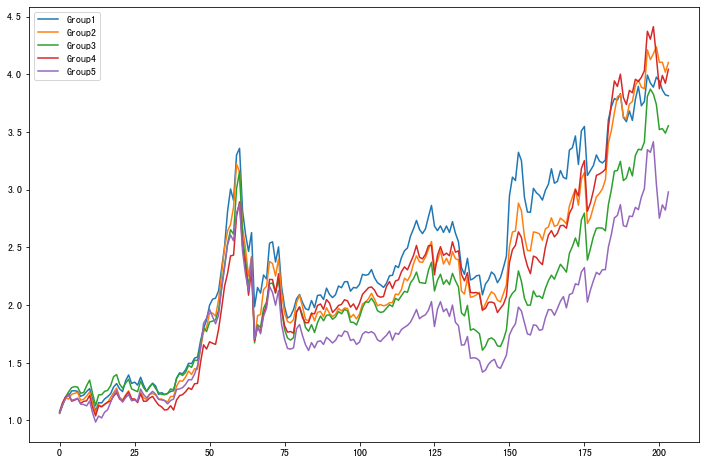

In [9]:
rf_predict_S1.HierarchicalBacktest()

## Net value backtest

In this part, we make backtest of each maching leaning method and draw the net value curve to compare it with IF300.

**CNN net value backtest**

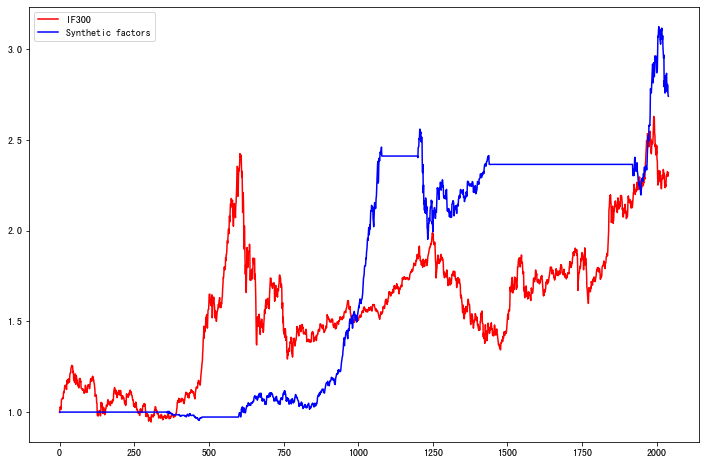

In [10]:
cnn_bt = bt.BackTest(position=pd.DataFrame((cnn_predict_w>0.5)+0), daily_return=pd.DataFrame(daily_return),window=10,
                          mv_weighted=True, ln_mv=pd.DataFrame(ln_mv))
cnn_result = cnn_bt.output_result()

**Logistic regression net value backtest**

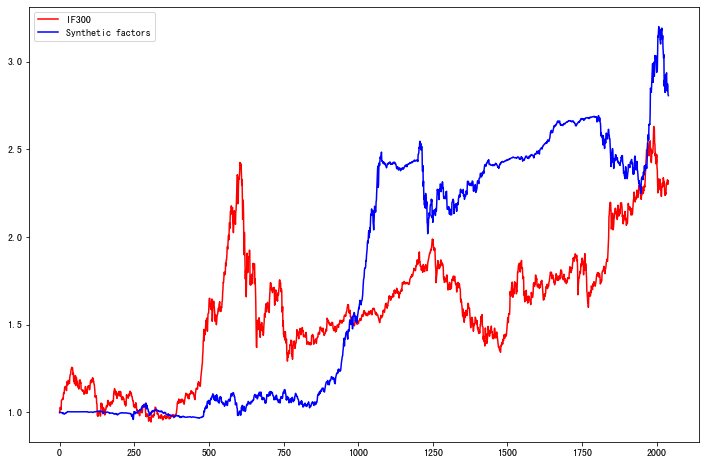

In [11]:
lr_bt = bt.BackTest(position=pd.DataFrame((lr_predict_w>0.5)+0), daily_return=pd.DataFrame(daily_return),window=10,
                          mv_weighted=True, ln_mv=pd.DataFrame(ln_mv))
lr_result = lr_bt.output_result()

**Random forest net value backtest**

Ramdom forset cannnot beat IF300.

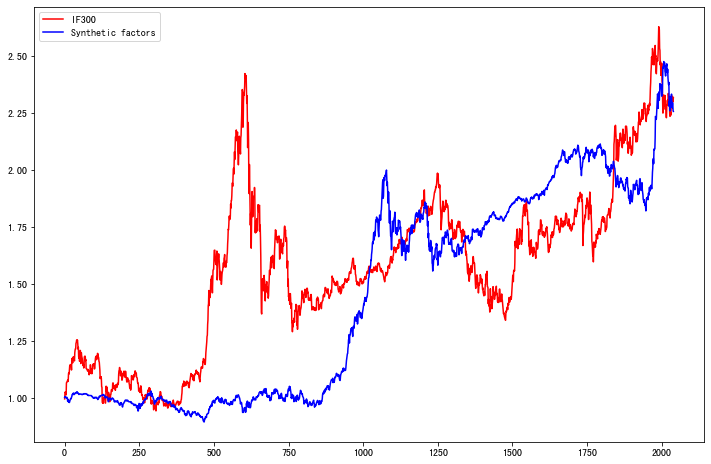

In [12]:
rf_bt = bt.BackTest(position=pd.DataFrame((rf_predict_w>0.5)+0), daily_return=pd.DataFrame(daily_return),window=10,
                          mv_weighted=True, ln_mv=pd.DataFrame(ln_mv))
rf_result = rf_bt.output_result()

In [14]:
net_value_analyze = pd.DataFrame(columns=['annualized rate of return ','annualized volatility','sharp ratio','maximum drawdown',],
                                 index=['CNN','Logistic regression','Random forest'])
net_value_analyze.loc['CNN',:] = ["%.2f%%" % (cnn_result['年化收益率']*100),
                                 "%.2f%%" % (cnn_result['年化波动率']*100),
                                 "%.2f" % (cnn_result['夏普比率']),
                                 "%.2f%%" % (cnn_result['最大回撤']*100)]
net_value_analyze.loc['Logistic regression',:] = ["%.2f%%" % (lr_result['年化收益率']*100),
                                 "%.2f%%" % (lr_result['年化波动率']*100),
                                 "%.2f" % (lr_result['夏普比率']),
                                 "%.2f%%" % (lr_result['最大回撤']*100)]
net_value_analyze.loc['Random forest',:] = ["%.2f%%" % (rf_result['年化收益率']*100),
                                                 "%.2f%%" % (rf_result['年化波动率']*100),
                                                 "%.2f" % (rf_result['夏普比率']),
                                                 "%.2f%%" % (rf_result['最大回撤']*100)]
net_value_analyze

,annualized rate of return,annualized volatility,sharp ratio,maximum drawdown
CNN,13.15%,12.46%,1.06,12.28%
Logistic regression,13.48%,13.19%,1.02,12.28%
Random forest,10.50%,12.48%,0.84,8.83%
